# Softmax Classification

>### [예제 14: SOL] Multi Variable Softmax Classification(TF)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


In [2]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[1,0,0],[1,0,0],[1,0,0],[0,1,0],[1,0,0],[0,1,0],[0,0,1],[0,1,0],[0,0,1],[0,0,1],[0,1,0],[0,0,1],[0,0,1]], dtype= tf.float32)

# 나이와 BMI 가 입력되면, 혈압등급을 0 : 정상,  1: 주의,  2: 경고  등급으로 구분하는 코드를 구현하라.
W = tf.Variable(tf.random.normal((2,3)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((1,3)), dtype=tf.float32)

In [3]:
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

In [4]:
def logits(x):
  return tf.matmul(x, W) + B

def Hypothesis(x):
  return tf.nn.softmax(logits(x))

In [5]:
def Cost():
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits(x_input), labels=labels))

### 학습 (Training)

In [6]:
%%time

# Parameter Set
epochs = 30000
learning_rate = 0.05

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>6}] cost = {:>10.4}".format(cnt, cost_graph[cnt]))
    
  optimizer.minimize(Cost,[W, B])

[     0] cost =      1.728
[  1500] cost =     0.7495
[  3000] cost =     0.7062
[  4500] cost =     0.6908
[  6000] cost =     0.6835
[  7500] cost =     0.6796
[  9000] cost =     0.6774
[ 10500] cost =      0.676
[ 12000] cost =     0.6751
[ 13500] cost =     0.6746
[ 15000] cost =     0.6742
[ 16500] cost =     0.6739
[ 18000] cost =     0.6738
[ 19500] cost =     0.6736
[ 21000] cost =     0.6736
[ 22500] cost =     0.6735
[ 24000] cost =     0.6735
[ 25500] cost =     0.6734
[ 27000] cost =     0.6734
[ 28500] cost =     0.6734
[ 30000] cost =     0.6734
CPU times: user 2min 12s, sys: 2.64 s, total: 2min 15s
Wall time: 2min 16s


>### Hypothesis Test 

In [7]:
print("[ Hypothesis test ]")
H_x = Hypothesis(x_input)

for x,h,l in zip(x_input_org, H_x, labels):
  print("Age:{},BMI:{} [label:{}]=>class:{}: {}".format(x[0],x[1],np.argmax(l), np.argmax(h.numpy()),h))

[ Hypothesis test ]
Age:25.0,BMI:22.0 [label:0]=>class:0: [8.90798926e-01 1.09084904e-01 1.16223302e-04]
Age:25.0,BMI:26.0 [label:1]=>class:0: [0.7015279  0.2927012  0.00577085]
Age:25.0,BMI:30.0 [label:2]=>class:1: [0.34010813 0.48349416 0.17639774]
Age:35.0,BMI:22.0 [label:0]=>class:0: [8.1109333e-01 1.8832545e-01 5.8124843e-04]
Age:35.0,BMI:26.0 [label:1]=>class:0: [0.54457766 0.43081683 0.02460548]
Age:35.0,BMI:30.0 [label:0]=>class:2: [0.15280774 0.411882   0.4353102 ]
Age:45.0,BMI:22.0 [label:0]=>class:0: [0.69243544 0.30483907 0.00272551]
Age:45.0,BMI:26.0 [label:0]=>class:1: [0.3638809  0.54581475 0.09030437]
Age:45.0,BMI:30.0 [label:1]=>class:2: [0.04596075 0.23489183 0.71914744]
Age:55.0,BMI:22.0 [label:0]=>class:0: [0.5386925  0.44966117 0.01164627]
Age:55.0,BMI:26.0 [label:1]=>class:1: [0.19204324 0.546183   0.26177377]
Age:55.0,BMI:30.0 [label:2]=>class:2: [0.01034846 0.10027885 0.8893727 ]
Age:65.0,BMI:22.0 [label:1]=>class:1: [0.37017244 0.5858707  0.0439569 ]
Age:65.0,B

In [8]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))  

In [9]:
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("\n[ Prediction by specific data ]")
print("Age : {}, BMI : {} => Class: {}".format(x_test[0][0],x_test[0][1],np.argmax(H_x[0])),H_x[0].numpy())


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 => Class: 1 [0.36675045 0.55755085 0.07569872]


>### Plotting

<function matplotlib.pyplot.show>

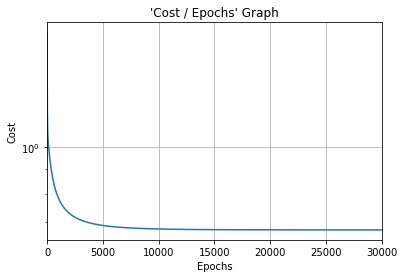

In [10]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show